## 데이터셋 불러오기

[Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) 데이터셋

- Zalando의 기사 이미지 데이터셋
- 60,000개의 학습 예제와 10,000개의 테스트 예제
- 흑백(grayscale)의 28x28 이미지
- 10개 분류(class)

FashionMNIST 데이터셋 매개변수
 - ``root`` : 학습/테스트 데이터가 저장되는 경로
 - ``train``: 학습용 또는 테스트용 데이터셋 여부
 - ``download=True`` : 데이터가 없는 경우 다운로드 여부
 - ``transform`` / ``target_transform`` : 입력영상과 레이블에 대한 변환 방법



In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 300kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.96MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.4MB/s]


In [3]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## 데이터셋을 순회하고 시각화하기
- 총 10개의 카테고리로 구성
- `Label`은 아래 코드에서 `labels_map`에 정의
- ``Dataset`` 에 리스트(list)처럼 직접 접근(index)가능

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

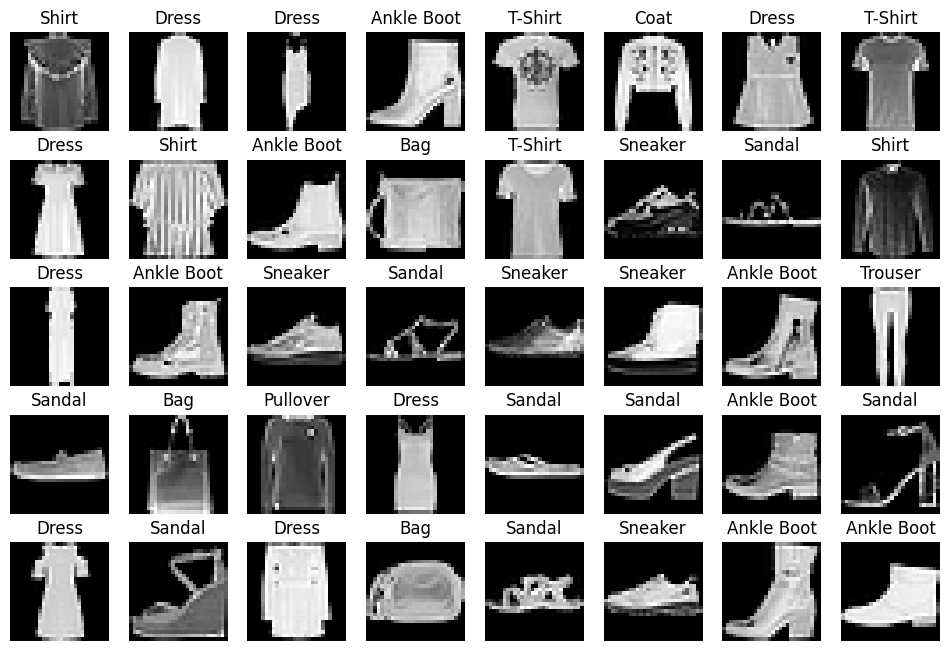

In [5]:
figure = plt.figure(figsize=(12, 8))
cols, rows = 8, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

------------------------------------------------------------------------------------------




## DataLoader로 학습용 데이터 준비하기

- dataset과 sampler를 감싸서 iterable한 객체로 반환
- Dataset으로 구축한 데이터를 batch 단위로 나누는 역할
- ``Dataset`` 입력 데이터와 정답(label)에 대한 객체
- ``DataLoader`` 매 에폭(epoch)마다 샘플들을 "미니배치(minibatch)"로 전달

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

DataLoader를 통해 순회하기



In [7]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


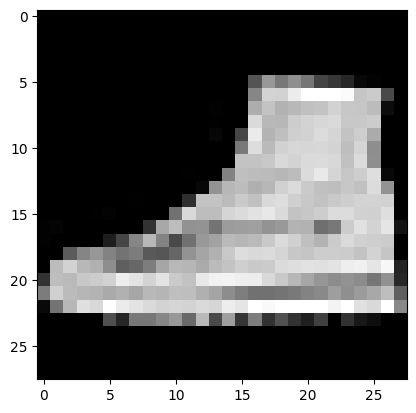

Label: 9


In [8]:
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

------------------------------------------------------------------------------------------




##로컬디렉토리에서 데이터 로드하기

images 폴더에 rps 데이터셋 다운로드

In [9]:
# 이미지 데이터셋 다운로드
import urllib.request
import zipfile
import glob

url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
urllib.request.urlretrieve(url, 'rps.zip')
local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('images/')
zip_ref.close()

print(glob.glob('images/rps/*'))


['images/rps/scissors', 'images/rps/rock', 'images/rps/paper']


폴더구조
- `images/rps`
  - `rock` 폴더
  - `paper` 폴더
  - `scissor` 폴더

In [10]:
# rock 폴더 하위에 위치한 .png 파일 10개 출력
glob.glob('images/rps/rock/*')[:10]

['images/rps/rock/rock05ck01-102.png',
 'images/rps/rock/rock06ck02-044.png',
 'images/rps/rock/rock05ck01-058.png',
 'images/rps/rock/rock06ck02-069.png',
 'images/rps/rock/rock04-085.png',
 'images/rps/rock/rock01-090.png',
 'images/rps/rock/rock07-k03-081.png',
 'images/rps/rock/rock07-k03-040.png',
 'images/rps/rock/rock03-031.png',
 'images/rps/rock/rock03-036.png']

In [11]:
image_folder = datasets.ImageFolder(root='images/rps',
                                    transform=transforms.Compose([
                                        transforms.ToTensor(),
                                    ])
                                   )

In [12]:
# class to index 라벨값 확인 (추후 시각화에 활용)
image_folder.class_to_idx

{'paper': 0, 'rock': 1, 'scissors': 2}

In [13]:
train_loader = torch.utils.data.DataLoader(image_folder,        # image_folder를 지정
                                           batch_size=32,       # 배치사이즈 지정
                                           shuffle=True,        # shuffle 여부 지정
                                           num_workers=8)       # num_workers 지정
test_loader = torch.utils.data.DataLoader(image_folder,          # 원래는 별도의 Validation Set의 root 경로를 지정해야 한다.
                                          batch_size=32,        # 배치사이즈 지정
                                          shuffle=False,        # shuffle 여부 지정
                                          num_workers=8)         # num_workers 지정

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [14]:
# 1개 batch 추출
images, labels = next(iter(train_loader))
print(images.shape, labels.shape)

torch.Size([32, 3, 300, 300]) torch.Size([32])


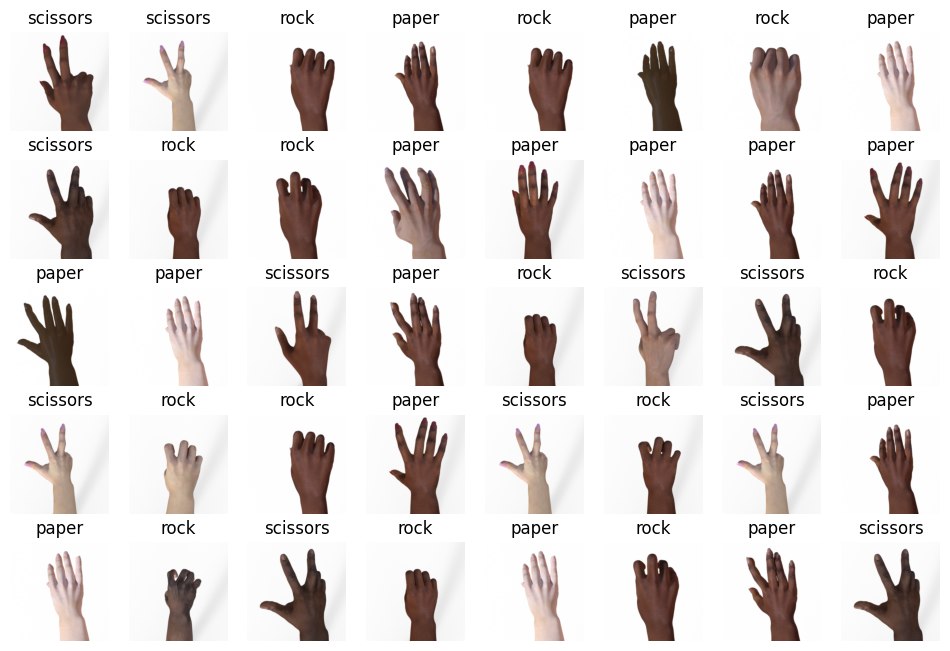

In [15]:
# ImageFolder의 속성 값인 class_to_idx를 할당
labels_map = {v:k for k, v in image_folder.class_to_idx.items()}

figure = plt.figure(figsize=(12, 8))
cols, rows = 8, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(images), size=(1,)).item()
    img, label = images[sample_idx], labels[sample_idx].item()
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(torch.permute(img, (1, 2, 0)))
plt.show()

# 사용자 정의 데이터셋 만들기
- 전체 dataset을 구성하는 단계
- 사용자 정의 Dataset 클래스는 반드시 3개 함수를 포함해야함
- `__init__`  전체 x_data와 y_data의 텐서 또는 목록을 전달
- `__len__` 데이터의 갯수를 입력된 데이터 또는 레이블로부터 계산해서 반
- `__getitem__` index번째 data를 로드하여 레이블과 함께 딕셔너리 형식으로 return하여야 함.

In [16]:
import os
import pandas as pd
from torchvision.io import read_image

In [17]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        # labels.csv 파일로 부터 이미지파일명과 레이블 정보
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):  # 데이터셋의 전체 개수를 반환
        return len(self.img_labels)

    def __getitem__(self, idx): # 주어진 idx에 해당하는 샘플을 데이터셋에서 반환
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)    # 샘플 이미지를 텐서로 변환
        label = self.img_labels.iloc[idx, 1]    # 샘플이미지의 레이블 변환
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label     # 텐서 이미지와 라벨을 Python 사전(dict)형으로 반환

labels.csv 파일:

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9



------------------------------------------------------------------------------------------


